### One time run for dataset division

Here a dataset division in training-validation-test sets is applied. The results are three zip, one for each set.


In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Go in the dataset folder
%cd '/content/drive/My Drive/dataset/'

/content/drive/.shortcut-targets-by-id/1j_LuUq10V7J9FLdYJfe5748cBLTnswxV/dataset


In [ ]:
# Unzip the dataset (zip file) in a temporary folder on the virtual machine.
!unzip ./color.zip -d /content/localdata

Output streaming troncato alle ultime 5000 righe.
  inflating: /content/localdata/color/Tomato___Tomato_Yellow_Leaf_Curl_Virus/11030437-942c-4cb4-a40e-b35236778a4b___UF.GRC_YLCV_Lab 02923.JPG  
  inflating: /content/localdata/color/Tomato___Tomato_Yellow_Leaf_Curl_Virus/1104914f-f715-4b02-b551-5cdf03f54bcb___YLCV_NREC 2717.JPG  
  inflating: /content/localdata/color/Tomato___Tomato_Yellow_Leaf_Curl_Virus/11061195-ce9c-4171-819d-663342a186e8___YLCV_NREC 0257.JPG  
  inflating: /content/localdata/color/Tomato___Tomato_Yellow_Leaf_Curl_Virus/110c50e6-039e-4f32-bda1-26262968ab8a___YLCV_GCREC 5539.JPG  
  inflating: /content/localdata/color/Tomato___Tomato_Yellow_Leaf_Curl_Virus/1114e83e-5477-483c-8bed-847b2c169c9f___YLCV_NREC 2257.JPG  
  inflating: /content/localdata/color/Tomato___Tomato_Yellow_Leaf_Curl_Virus/111d4096-e9eb-4f32-9a25-f3c19b92c627___YLCV_GCREC 2209.JPG  
  inflating: /content/localdata/color/Tomato___Tomato_Yellow_Leaf_Curl_Virus/1126f296-0c84-4f9d-b66b-1e9a91794ec9___UF.

In [ ]:
##### Create Train - Val - Test folders #####
# Takes the unzipped files of the dataset from the root_dir (files should be
# divided into different subfolders - one for each class) and creates a folder
# for each set in the root_root_dir containing the split part of files.
# For each class, files are randomly divided.
#####
import os
import numpy as np
import shutil
import random
root_root_dir = '/content/localdata/'
root_dir = '/content/localdata/color' 
classes_dir = []
for i in os.listdir(root_dir):
    classes_dir.append(i)

# Splitting ratios (default: 60% training, 20% validation, 20% test)
# Note that the actual division may differ a bit
val_ratio = 0.20
test_ratio = 0.20

for cls in classes_dir:
    print('/n****** CLASS ', cls, '******')
    print('> Creating class folders')
    
    os.makedirs(root_root_dir +'train/' + cls)
    os.makedirs(root_root_dir +'val/' + cls)
    os.makedirs(root_root_dir +'test/' + cls)
    

    src = root_dir + '/' + cls

    allFileNames = os.listdir(src)
    np.random.shuffle(allFileNames)
    train_FileNames, val_FileNames, test_FileNames = np.split(np.array(allFileNames),
                                                              [int(len(allFileNames)* (1 - (val_ratio + test_ratio))), 
                                                              int(len(allFileNames)* (1 - test_ratio))])


    train_FileNames = [src+'/'+ name for name in train_FileNames.tolist()]
    val_FileNames = [src+'/' + name for name in val_FileNames.tolist()]
    test_FileNames = [src+'/' + name for name in test_FileNames.tolist()]

    print('Total images in class ', cls, ': ', len(allFileNames))
    print('Training: ', len(train_FileNames))
    print('Validation: ', len(val_FileNames))
    print('Testing: ', len(test_FileNames))

    for name in train_FileNames:
        shutil.copy(name, root_root_dir +'train/' + cls)

    for name in val_FileNames:
        shutil.copy(name, root_root_dir +'val/' + cls)

    for name in test_FileNames:
        shutil.copy(name, root_root_dir +'test/' + cls)

In [ ]:
# Zip the train-val-test sets again
%cd /content/localdata
!zip -r train.zip train/
!zip -r val.zip val/
!zip -r test.zip test/

Output streaming troncato alle ultime 5000 righe.
  adding: test/Tomato___Spider_mites Two-spotted_spider_mite/2fb77f60-ae5b-40c4-b6fb-3c90ac55ccd4___Com.G_SpM_FL 9367.JPG (deflated 1%)
  adding: test/Tomato___Spider_mites Two-spotted_spider_mite/fbac63f2-cfbc-4c5c-a623-e40b1314fc83___Com.G_SpM_FL 8784.JPG (deflated 1%)
  adding: test/Tomato___Spider_mites Two-spotted_spider_mite/c13efacd-b785-4e4f-bb53-3e99e7df7938___Com.G_SpM_FL 8852.JPG (deflated 1%)
  adding: test/Tomato___Spider_mites Two-spotted_spider_mite/df453659-9691-44cb-9808-6a554ad92e10___Com.G_SpM_FL 1533.JPG (deflated 1%)
  adding: test/Tomato___Spider_mites Two-spotted_spider_mite/eafccf05-17e8-4f79-8016-ddcf30e51589___Com.G_SpM_FL 8616.JPG (deflated 1%)
  adding: test/Tomato___Spider_mites Two-spotted_spider_mite/8e2bcfaf-0564-4d2b-966d-b69dc9492ed9___Com.G_SpM_FL 9436.JPG (deflated 1%)
  adding: test/Tomato___Spider_mites Two-spotted_spider_mite/c5b6b543-1fe9-4607-94c2-3342dcc92043___Com.G_SpM_FL 1289.JPG (deflated 1%

In [ ]:
# Copy the three zip files on Drive
!cp train.zip '/content/drive/MyDrive/NN/train.zip'
!cp val.zip '/content/drive/MyDrive/NN/val.zip'
!cp test.zip '/content/drive/MyDrive/NN/test.zip'

Here we create the zip of our second test set

In [ ]:
# Go to the folder where the zips are
%cd '/content/drive/My Drive/dataset/'

/content/drive/.shortcut-targets-by-id/1j_LuUq10V7J9FLdYJfe5748cBLTnswxV/dataset


In [ ]:
# Put files on the content path of the Colab VM
!unzip ./train.zip -d /content/localdata
!unzip ./val.zip -d /content/localdata
!unzip ./test.zip -d /content/localdata

### Prepare data for training

To speed up the training phase, the data set is loaded locally on the Colab virtual machine.
So here the train, val and test zips are unzipped so to have all files available locally.
[To do just once when the VM is started]

In [ ]:
# Go to the folder where the zips are
%cd '/content/drive/My Drive/dataset/'

/content/drive/.shortcut-targets-by-id/1j_LuUq10V7J9FLdYJfe5748cBLTnswxV/dataset


In [ ]:
# Just a few seconds and all files will be on the content path of the Colab VM
!unzip ./train.zip -d /content/localdata
!unzip ./val.zip -d /content/localdata
!unzip ./test.zip -d /content/localdata

Output streaming troncato alle ultime 5000 righe.
  inflating: /content/localdata/test/Orange___Haunglongbing_(Citrus_greening)/cf285655-9dae-4423-8ee3-fc8eebb30f47___UF.Citrus_HLB_Lab 1656.JPG  
  inflating: /content/localdata/test/Orange___Haunglongbing_(Citrus_greening)/e96e8f2f-060c-43f6-9d3f-7a3a64ca86d5___CREC_HLB 6404.JPG  
  inflating: /content/localdata/test/Orange___Haunglongbing_(Citrus_greening)/9745c943-50a7-44ba-951e-55c49ba416c0___CREC_HLB 4276.JPG  
  inflating: /content/localdata/test/Orange___Haunglongbing_(Citrus_greening)/6b8fdb38-59d6-45bc-9ec4-091be13845d1___UF.Citrus_HLB_Lab 0018.JPG  
  inflating: /content/localdata/test/Orange___Haunglongbing_(Citrus_greening)/af714271-8190-4586-8fae-c59cfd664c19___CREC_HLB 4495.JPG  
  inflating: /content/localdata/test/Orange___Haunglongbing_(Citrus_greening)/32a14cd6-07e3-49c9-b61d-67cf42f345e1___UF.Citrus_HLB_Lab 1604.JPG  
  inflating: /content/localdata/test/Orange___Haunglongbing_(Citrus_greening)/423ef98a-2f31-44d6-b469

### Data Augmentation

Data Augmentation is essential to improve results and reduce overfitting.

Here some different techniques:


*   Horizontal Flip
*   Vertical Flip
*   Random crop
*   Rotation range
*   Brightness range

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.4.1


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os, datetime
from tensorflow import keras
import time
from tensorflow.keras import models, layers, optimizers, applications
from tensorflow.keras.callbacks import TensorBoard, EarlyStopping, ModelCheckpoint
from skimage.transform import resize

In [ ]:
# Go to the project folder on Drive
%cd '/content/drive/My Drive/'

/content/drive/My Drive


In [ ]:
# Set the paths
train_data_dir = '/content/localdata/train/'
val_data_dir = '/content/localdata/val/'
test_data_dir = '/content/localdata/test/'
target_image_size = (256,256)

In [ ]:
# Random crop is not natively implemented in the ImageDataGenerator class, here a custom version
def random_crop(image):
    height, width = image.shape[:2]
    random_array = np.random.random(size=3);
    delta = int((width*0.5) * (1+random_array[0]*0.5))
    x = int(random_array[1] * (width-delta))
    y = int(random_array[2] * (height-delta))

    image_crop = image[y:y+delta, x:x+delta, 0:3]
    image_crop_resize = resize(image_crop, image.shape)
    return image_crop_resize


In [ ]:
# Select augmentation technique decommenting (opt)
image_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255,
                                                                  #horizontal_flip=True,
                                                                  #brightness_range=[0.5,1.5],
                                                                  #vertical_flip=True,
                                                                  #rotation_range=25,
                                                                  #preprocessing_function=random_crop
                                                                  )
# No augmentation for the test set
test_image_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

In [ ]:
train_data_gen = image_generator.flow_from_directory(
                                                     directory=train_data_dir,
                                                     color_mode='rgb',
                                                     batch_size=32,
                                                     shuffle=True,
                                                     seed=123,
                                                     target_size=target_image_size
                                                     )

Found 32571 images belonging to 38 classes.


In [ ]:
val_data_gen = image_generator.flow_from_directory(
                                                    directory=val_data_dir,
                                                    batch_size=32,
                                                    color_mode='rgb',
                                                    shuffle=True,
                                                    seed=123,
                                                    target_size=target_image_size)

Found 10858 images belonging to 38 classes.


In [ ]:
test_data_gen = test_image_generator.flow_from_directory(
                                                    directory=test_data_dir,
                                                    batch_size=32,
                                                    shuffle=False,
                                                    target_size=target_image_size)

Found 10876 images belonging to 38 classes.


In [ ]:
# dict with class name <-> index class
classes_dict = train_data_gen.class_indices
to_classes_dict = {index: classe for classe, index in classes_dict.items()}



### Model definition : Residual Split Attention Network



In [ ]:
import tensorflow as tf
print(tf.__version__)

2.4.1


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os, datetime
from tensorflow import keras
import time
from tensorflow.keras import models, layers, optimizers, applications, activations
from tensorflow.keras.layers import Conv2D , BatchNormalization ,Activation, Input, ZeroPadding2D, MaxPooling2D, AveragePooling2D,GlobalAveragePooling2D, Flatten, Dense, Dropout, Add
from tensorflow.keras.callbacks import TensorBoard, EarlyStopping, ModelCheckpoint
from tensorflow.keras.utils import plot_model
from skimage.transform import resize

In [ ]:

def res_identity(x, filters): 

  x_skip = x 
  f1, f2 = filters

  x = Conv2D(f1, kernel_size=(1, 1), strides=(1, 1),groups=2)(x)
  x = BatchNormalization(epsilon=1e-05,momentum= 0.1)(x)

  x = Conv2D(int(2*f1), kernel_size=(3, 3), strides=(1, 1), padding='same',groups=2)(x)
  x = BatchNormalization(epsilon=1e-05,momentum= 0.1)(x)
  x = Activation(activations.relu)(x)

  x = Conv2D(int(f1/2), kernel_size=(1, 1), strides=(1, 1))(x)
  x = BatchNormalization(epsilon=1e-05,momentum= 0.1)(x)

  x = Conv2D(int(2*f1), kernel_size=(1, 1), strides=(1, 1))(x)
  x = BatchNormalization(epsilon=1e-05,momentum= 0.1)(x)
  x = Activation(activations.softmax)(x)

  x = Conv2D(f2, kernel_size=(1, 1), strides=(1, 1))(x)
  x = BatchNormalization(epsilon=1e-05,momentum= 0.1)(x)

  x = Add()([x, x_skip])
  x = Activation(activations.relu)(x)

  return x

In [ ]:
def res_conv1(x, filters):

  x_skip = x
  f1, f2 = filters

  x = Conv2D(f1, kernel_size=(1, 1), strides=(1, 1))(x)
  x = BatchNormalization(epsilon=1e-05,momentum= 0.1)(x)

  x = Conv2D(int(2*f1), kernel_size=(3, 3), strides=(1, 1), padding='same',groups=2)(x)
  x = BatchNormalization(epsilon=1e-05,momentum= 0.1)(x)
  x = Activation(activations.relu)(x)

  x = Conv2D(int(f1/2), kernel_size=(1, 1), strides=(1, 1))(x)
  x = BatchNormalization(epsilon=1e-05,momentum= 0.1)(x)
  x = Conv2D(int(2*f1), kernel_size=(1, 1), strides=(1, 1))(x)
  x = Activation(activations.softmax)(x)

  x = Conv2D(f2, kernel_size=(1, 1), strides=(1, 1))(x)
  x = BatchNormalization(epsilon=1e-05,momentum= 0.1)(x)
  x = Activation(activations.relu)(x)

  x_skip = AveragePooling2D(pool_size=(1,1), strides=(1,1),padding='valid')(x_skip)
  x_skip = Conv2D(f2, kernel_size=(1, 1), strides=(1, 1))(x_skip)
  x_skip = BatchNormalization(epsilon=1e-05,momentum= 0.1)(x_skip)

  x = Add()([x, x_skip])
  x = Activation(activations.relu)(x)

  return x

In [ ]:
def res_conv2(x, filters):
  #split att block
  x_skip = x
  f1, f2 = filters

  x = Conv2D(f1, kernel_size=(1, 1), strides=(1, 1))(x)
  x = BatchNormalization(epsilon=1e-05,momentum= 0.1)(x)
  x = AveragePooling2D(pool_size=(3,3), strides=(2,2), padding='same')(x)

  x = Conv2D(int(2*f1), kernel_size=(3, 3), strides=(1, 1), padding='same',groups=2)(x)
  x = BatchNormalization(epsilon=1e-05,momentum= 0.1)(x)
  x = Activation(activations.relu)(x)

  x = Conv2D(int(f1/2), kernel_size=(1, 1), strides=(1, 1))(x)
  x = BatchNormalization(epsilon=1e-05,momentum= 0.1)(x)
  x = Conv2D(int(2*f1), kernel_size=(1, 1), strides=(1, 1))(x)
  x = Activation(activations.softmax)(x)

  x = Conv2D(f2, kernel_size=(1, 1), strides=(1, 1))(x)
  x = BatchNormalization(epsilon=1e-05,momentum= 0.1)(x)
  x = Activation(activations.relu)(x)

  x_skip = AveragePooling2D(pool_size=(2,2), strides=(2,2),padding='valid')(x_skip)
  x_skip = Conv2D(f2, kernel_size=(1, 1), strides=(1, 1))(x_skip)
  x_skip = BatchNormalization(epsilon=1e-05,momentum= 0.1)(x_skip)

  x = Add()([x, x_skip])
  x = Activation(activations.relu)(x)

  return x

In [ ]:

def myResNest():

  input_im = Input(shape= (256, 256, 3))
  x = ZeroPadding2D(padding=(3, 3))(input_im)

  x = Conv2D(64, kernel_size=(3, 3), strides=(2, 2),padding ='same', use_bias= False)(x)
  x = BatchNormalization(epsilon=1e-05,momentum= 0.1)(x)
  x = Activation(activations.relu)(x)

  x = Conv2D(32, kernel_size=(3, 3), strides=(1, 1),padding ='same', use_bias= False)(x)
  x = BatchNormalization(epsilon=1e-05,momentum= 0.1)(x)
  x = Activation(activations.relu)(x)

  x = Conv2D(64, kernel_size=(3, 3), strides=(1, 1),padding ='same', use_bias= False)(x)
  x = BatchNormalization(epsilon=1e-05,momentum= 0.1)(x)
  x = Activation(activations.relu)(x)
  x = MaxPooling2D((3, 3), strides=(2, 2),padding='same')(x)


  x = res_conv1(x, filters=(64, 256))
  x = res_identity(x, filters=(64, 256))
  x = res_identity(x, filters=(64, 256))

  x = res_conv2(x, filters=(128, 512))
  x = res_identity(x, filters=(128, 512))
  x = res_identity(x, filters=(128, 512))
  x = res_identity(x, filters=(128, 512))

  '''
  x = res_conv(x, s=2, filters=(256, 1024))
  x = res_identity(x, filters=(256, 1024))
  x = res_identity(x, filters=(256, 1024))
  x = res_identity(x, filters=(256, 1024))
  x = res_identity(x, filters=(256, 1024))
  x = res_identity(x, filters=(256, 1024))

  x = res_conv(x, s=2, filters=(512, 2048))
  x = res_identity(x, filters=(512, 2048))
  x = res_identity(x, filters=(512, 2048))
  '''

  x = GlobalAveragePooling2D()(x)
  x = Dense(256, activation='relu')(x)
  x = layers.Dropout(0.2)(x)
  x = Dense(38, activation='softmax', kernel_initializer='he_normal')(x)


  model = models.Model(inputs=input_im, outputs=x, name='Resnet50')
  model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


  return model

Model: "Resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
zero_padding2d (ZeroPadding2D)  (None, 262, 262, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 131, 131, 64) 1728        zero_padding2d[0][0]             
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 131, 131, 64) 256         conv2d[0][0]                     
___________________________________________________________________________________________

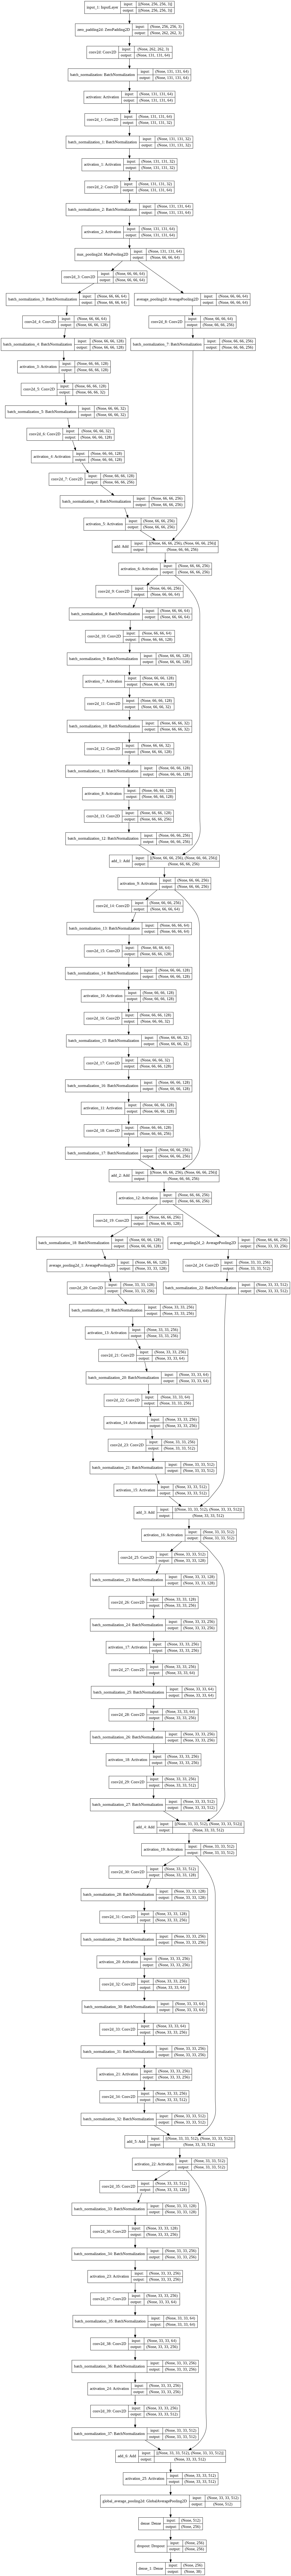

In [ ]:
model = myResNest()

model.summary()

plot_model(model, show_shapes=True, to_file='residual_module.png')

### Model definition : Sequential Spli Attention Network


In [ ]:
# model_2L

def myResNest_seq():
  model = models.Sequential()

  model.add(layers.Conv2D(filters=32, kernel_size=(3, 3), strides=(2, 2), padding ='same', use_bias= False , input_shape=(256, 256, 3)))
  model.add(layers.BatchNormalization(epsilon=1e-05,momentum= 0.1))
  model.add(layers.ReLU())

  model.add(layers.Conv2D(filters=32, kernel_size=(3, 3), strides=(1, 1), padding ='same', use_bias= False))
  model.add(layers.BatchNormalization(epsilon=1e-05,momentum= 0.1))
  model.add(layers.ReLU())

  model.add(layers.Conv2D(filters=64, kernel_size=(3, 3), strides=(1, 1), padding ='same', use_bias= False))
  model.add(layers.BatchNormalization(epsilon=1e-05,momentum= 0.1))
  model.add(layers.ReLU())

  model.add(layers.MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='same'))
  
  #LAYER1#######

  #Bottleneck0##
  model.add(layers.Conv2D(filters=64, kernel_size=(1, 1), strides=(1, 1), use_bias= False))
  model.add(layers.BatchNormalization(epsilon=1e-05,momentum= 0.1))

  #SplAtConv2d##
  model.add(layers.Conv2D(filters=128, kernel_size=(3, 3), strides=(1, 1), padding ='same', groups=2, use_bias= False))
  model.add(layers.BatchNormalization(epsilon=1e-05,momentum= 0.1))
  model.add(layers.ReLU())
  model.add(layers.Conv2D(filters=32, kernel_size=(1, 1), strides=(1, 1)))
  model.add(layers.BatchNormalization(epsilon=1e-05,momentum= 0.1))
  model.add(layers.Conv2D(filters=128, kernel_size=(1, 1), strides=(1, 1)))
  model.add(layers.Softmax())

  model.add(layers.Conv2D(filters=256, kernel_size=(1, 1), strides=(1, 1), use_bias= False))
  model.add(layers.BatchNormalization(epsilon=1e-05,momentum= 0.1))
  model.add(layers.ReLU())

  #downsample###
  model.add(layers.AveragePooling2D(pool_size=(1,1), strides=(1,1),padding='valid'))
  model.add(layers.Conv2D(filters=256, kernel_size=(1, 1), strides=(1, 1), use_bias= False))
  model.add(layers.BatchNormalization(epsilon=1e-05,momentum= 0.1))

  #Bottleneck1##
  model.add(layers.Conv2D(filters=64, kernel_size=(1, 1), strides=(1, 1), use_bias= False))
  model.add(layers.BatchNormalization(epsilon=1e-05,momentum= 0.1))

  #SplAtConv2d##
  model.add(layers.Conv2D(filters=128, kernel_size=(3, 3), strides=(1, 1), padding ='same',groups=2 , use_bias= False))
  model.add(layers.BatchNormalization(epsilon=1e-05,momentum= 0.1))
  model.add(layers.ReLU())
  model.add(layers.Conv2D(filters=32, kernel_size=(1, 1), strides=(1, 1)))
  model.add(layers.BatchNormalization(epsilon=1e-05,momentum= 0.1))
  model.add(layers.Conv2D(filters=128, kernel_size=(1, 1), strides=(1, 1)))
  model.add(layers.Softmax())

  model.add(layers.Conv2D(filters=256, kernel_size=(1, 1), strides=(1, 1), use_bias= False))
  model.add(layers.BatchNormalization(epsilon=1e-05,momentum= 0.1))
  model.add(layers.ReLU())

  '''
  
  #Bottleneck2##
  model.add(layers.Conv2D(filters=64, kernel_size=(1, 1), strides=(1, 1), use_bias= False))
  model.add(layers.BatchNormalization(epsilon=1e-05,momentum= 0.1))

  #SplAtConv2d##
  model.add(layers.Conv2D(filters=128, kernel_size=(3, 3), strides=(1, 1), padding ='same', groups=2 , use_bias= False))
  model.add(layers.BatchNormalization(epsilon=1e-05,momentum= 0.1))
  model.add(layers.ReLU())
  model.add(layers.Conv2D(filters=32, kernel_size=(1, 1), strides=(1, 1)))
  model.add(layers.BatchNormalization(epsilon=1e-05,momentum= 0.1))
  model.add(layers.Conv2D(filters=128, kernel_size=(1, 1), strides=(1, 1)))
  model.add(layers.Softmax())

  model.add(layers.Conv2D(filters=256, kernel_size=(1, 1), strides=(1, 1), use_bias= False))
  model.add(layers.BatchNormalization(epsilon=1e-05,momentum= 0.1))
  model.add(layers.ReLU())

  '''

  #LAYER2#######

  #Bottleneck0##
  model.add(layers.Conv2D(filters=128, kernel_size=(1, 1), strides=(1, 1), use_bias= False))
  model.add(layers.BatchNormalization(epsilon=1e-05,momentum= 0.1))
  model.add(layers.AveragePooling2D(pool_size=(3,3), strides=(2,2), padding='same'))

  #SplAtConv2d##
  model.add(layers.Conv2D(filters=256, kernel_size=(3, 3), strides=(1, 1), padding ='same', groups=2 , use_bias= False))
  model.add(layers.BatchNormalization(epsilon=1e-05,momentum= 0.1))
  model.add(layers.ReLU())
  model.add(layers.Conv2D(filters=64, kernel_size=(1, 1), strides=(1, 1)))
  model.add(layers.BatchNormalization(epsilon=1e-05,momentum= 0.1))
  model.add(layers.Conv2D(filters=256, kernel_size=(1, 1), strides=(1, 1)))
  model.add(layers.Softmax())

  model.add(layers.Conv2D(filters=512, kernel_size=(1, 1), strides=(1, 1), use_bias= False))
  model.add(layers.BatchNormalization(epsilon=1e-05,momentum= 0.1))
  model.add(layers.ReLU())

  #downsample###
  model.add(layers.AveragePooling2D(pool_size=(2,2), strides=(2,2),padding='valid'))
  model.add(layers.Conv2D(filters=256, kernel_size=(1, 1), strides=(1, 1), use_bias= False))
  model.add(layers.BatchNormalization(epsilon=1e-05,momentum= 0.1))

  #Bottleneck1##
  model.add(layers.Conv2D(filters=64, kernel_size=(1, 1), strides=(1, 1), use_bias= False))
  model.add(layers.BatchNormalization(epsilon=1e-05,momentum= 0.1))

  #SplAtConv2d##
  model.add(layers.Conv2D(filters=128, kernel_size=(3, 3), strides=(1, 1), padding ='same', groups=2 , use_bias= False))
  model.add(layers.BatchNormalization(epsilon=1e-05,momentum= 0.1))
  model.add(layers.ReLU())
  model.add(layers.Conv2D(filters=32, kernel_size=(1, 1), strides=(1, 1)))
  model.add(layers.BatchNormalization(epsilon=1e-05,momentum= 0.1))
  model.add(layers.Conv2D(filters=128, kernel_size=(1, 1), strides=(1, 1)))
  model.add(layers.Softmax())

  model.add(layers.Conv2D(filters=256, kernel_size=(1, 1), strides=(1, 1), use_bias= False))
  model.add(layers.BatchNormalization(epsilon=1e-05,momentum= 0.1))
  model.add(layers.ReLU())

  #Bottleneck2##
  model.add(layers.Conv2D(filters=64, kernel_size=(1, 1), strides=(1, 1), use_bias= False))
  model.add(layers.BatchNormalization(epsilon=1e-05,momentum= 0.1))

  #SplAtConv2d##
  model.add(layers.Conv2D(filters=128, kernel_size=(3, 3), strides=(1, 1), padding ='same', groups=2 , use_bias= False))
  model.add(layers.BatchNormalization(epsilon=1e-05,momentum= 0.1))
  model.add(layers.ReLU())
  model.add(layers.Conv2D(filters=32, kernel_size=(1, 1), strides=(1, 1)))
  model.add(layers.BatchNormalization(epsilon=1e-05,momentum= 0.1))
  model.add(layers.Conv2D(filters=128, kernel_size=(1, 1), strides=(1, 1)))
  model.add(layers.Softmax())

  model.add(layers.Conv2D(filters=256, kernel_size=(1, 1), strides=(1, 1), use_bias= False))
  model.add(layers.BatchNormalization(epsilon=1e-05,momentum= 0.1))
  model.add(layers.ReLU())
  
  #Bottleneck3##
  model.add(layers.Conv2D(filters=128, kernel_size=(1, 1), strides=(1, 1), use_bias= False))
  model.add(layers.BatchNormalization(epsilon=1e-05,momentum= 0.1))

  #SplAtConv2d##
  model.add(layers.Conv2D(filters=256, kernel_size=(3, 3), strides=(1, 1), padding ='same', groups=2 , use_bias= False))
  model.add(layers.BatchNormalization(epsilon=1e-05,momentum= 0.1))
  model.add(layers.ReLU())
  model.add(layers.Conv2D(filters=64, kernel_size=(1, 1), strides=(1, 1)))
  model.add(layers.BatchNormalization(epsilon=1e-05,momentum= 0.1))
  model.add(layers.Conv2D(filters=256, kernel_size=(1, 1), strides=(1, 1)))
  model.add(layers.Softmax())

  model.add(layers.Conv2D(filters=256, kernel_size=(1, 1), strides=(1, 1), use_bias= False))
  model.add(layers.BatchNormalization(epsilon=1e-05,momentum= 0.1))
  model.add(layers.ReLU())

  '''

  #LAYER3#######

  #Bottleneck0##
  model.add(layers.Conv2D(filters=256, kernel_size=(1, 1), strides=(1, 1), use_bias= False))
  model.add(layers.BatchNormalization(epsilon=1e-05,momentum= 0.1))
  model.add(layers.AveragePooling2D(pool_size=(3,3), strides=(2,2), padding='same'))

  #SplAtConv2d##
  model.add(layers.Conv2D(filters=512, kernel_size=(3, 3), strides=(1, 1), padding ='same', groups=2, use_bias= False))
  model.add(layers.BatchNormalization(epsilon=1e-05,momentum= 0.1))
  model.add(layers.ReLU())
  model.add(layers.Conv2D(filters=128, kernel_size=(1, 1), strides=(1, 1)))
  model.add(layers.BatchNormalization(epsilon=1e-05,momentum= 0.1))
  model.add(layers.Conv2D(filters=512, kernel_size=(1, 1), strides=(1, 1)))
  model.add(layers.Softmax())

  model.add(layers.Conv2D(filters=1024, kernel_size=(1, 1), strides=(1, 1), use_bias= False))
  model.add(layers.BatchNormalization(epsilon=1e-05,momentum= 0.1))
  model.add(layers.ReLU())

  #downsample###
  model.add(layers.AveragePooling2D(pool_size=(2,2), strides=(2,2),padding='valid'))
  model.add(layers.Conv2D(filters=1024, kernel_size=(1, 1), strides=(1, 1), use_bias= False))
  model.add(layers.BatchNormalization(epsilon=1e-05,momentum= 0.1))

  #Bottleneck1##
  model.add(layers.Conv2D(filters=256, kernel_size=(1, 1), strides=(1, 1), use_bias= False))
  model.add(layers.BatchNormalization(epsilon=1e-05,momentum= 0.1))

  #SplAtConv2d##
  model.add(layers.Conv2D(filters=512, kernel_size=(3, 3), strides=(1, 1), padding ='same', groups=2 , use_bias= False))
  model.add(layers.BatchNormalization(epsilon=1e-05,momentum= 0.1))
  model.add(layers.ReLU())
  model.add(layers.Conv2D(filters=128, kernel_size=(1, 1), strides=(1, 1)))
  model.add(layers.BatchNormalization(epsilon=1e-05,momentum= 0.1))
  model.add(layers.Conv2D(filters=512, kernel_size=(1, 1), strides=(1, 1)))
  model.add(layers.Softmax())

  model.add(layers.Conv2D(filters=1024, kernel_size=(1, 1), strides=(1, 1), use_bias= False))
  model.add(layers.BatchNormalization(epsilon=1e-05,momentum= 0.1))
  model.add(layers.ReLU())
  
  #Bottleneck2##
  model.add(layers.Conv2D(filters=256, kernel_size=(1, 1), strides=(1, 1), use_bias= False))
  model.add(layers.BatchNormalization(epsilon=1e-05,momentum= 0.1))

  #SplAtConv2d##
  model.add(layers.Conv2D(filters=512, kernel_size=(3, 3), strides=(1, 1), padding ='same', groups=2 , use_bias= False))
  model.add(layers.BatchNormalization(epsilon=1e-05,momentum= 0.1))
  model.add(layers.ReLU())
  model.add(layers.Conv2D(filters=128, kernel_size=(1, 1), strides=(1, 1)))
  model.add(layers.BatchNormalization(epsilon=1e-05,momentum= 0.1))
  model.add(layers.Conv2D(filters=512, kernel_size=(1, 1), strides=(1, 1)))
  model.add(layers.Softmax())

  model.add(layers.Conv2D(filters=1024, kernel_size=(1, 1), strides=(1, 1), use_bias= False))
  model.add(layers.BatchNormalization(epsilon=1e-05,momentum= 0.1))
  model.add(layers.ReLU())

  #Bottleneck3##
  model.add(layers.Conv2D(filters=256, kernel_size=(1, 1), strides=(1, 1), use_bias= False))
  model.add(layers.BatchNormalization(epsilon=1e-05,momentum= 0.1))

  #SplAtConv2d##
  model.add(layers.Conv2D(filters=512, kernel_size=(3, 3), strides=(1, 1), padding ='same', groups=2 , use_bias= False))
  model.add(layers.BatchNormalization(epsilon=1e-05,momentum= 0.1))
  model.add(layers.ReLU())
  model.add(layers.Conv2D(filters=128, kernel_size=(1, 1), strides=(1, 1)))
  model.add(layers.BatchNormalization(epsilon=1e-05,momentum= 0.1))
  model.add(layers.Conv2D(filters=512, kernel_size=(1, 1), strides=(1, 1)))
  model.add(layers.Softmax())

  model.add(layers.Conv2D(filters=1024, kernel_size=(1, 1), strides=(1, 1), use_bias= False))
  model.add(layers.BatchNormalization(epsilon=1e-05,momentum= 0.1))
  model.add(layers.ReLU())

  #Bottleneck4##
  model.add(layers.Conv2D(filters=256, kernel_size=(1, 1), strides=(1, 1), use_bias= False))
  model.add(layers.BatchNormalization(epsilon=1e-05,momentum= 0.1))

  #SplAtConv2d##
  model.add(layers.Conv2D(filters=512, kernel_size=(3, 3), strides=(1, 1), padding ='same', groups=2 , use_bias= False))
  model.add(layers.BatchNormalization(epsilon=1e-05,momentum= 0.1))
  model.add(layers.ReLU())
  model.add(layers.Conv2D(filters=128, kernel_size=(1, 1), strides=(1, 1)))
  model.add(layers.BatchNormalization(epsilon=1e-05,momentum= 0.1))
  model.add(layers.Conv2D(filters=512, kernel_size=(1, 1), strides=(1, 1)))
  model.add(layers.Softmax())

  model.add(layers.Conv2D(filters=1024, kernel_size=(1, 1), strides=(1, 1), use_bias= False))
  model.add(layers.BatchNormalization(epsilon=1e-05,momentum= 0.1))
  model.add(layers.ReLU())

  #Bottleneck5##
  model.add(layers.Conv2D(filters=256, kernel_size=(1, 1), strides=(1, 1), use_bias= False))
  model.add(layers.BatchNormalization(epsilon=1e-05,momentum= 0.1))

  #SplAtConv2d##
  model.add(layers.Conv2D(filters=512, kernel_size=(3, 3), strides=(1, 1), padding ='same', groups=2 , use_bias= False))
  model.add(layers.BatchNormalization(epsilon=1e-05,momentum= 0.1))
  model.add(layers.ReLU())
  model.add(layers.Conv2D(filters=128, kernel_size=(1, 1), strides=(1, 1)))
  model.add(layers.BatchNormalization(epsilon=1e-05,momentum= 0.1))
  model.add(layers.Conv2D(filters=512, kernel_size=(1, 1), strides=(1, 1)))
  model.add(layers.Softmax())

  model.add(layers.Conv2D(filters=1024, kernel_size=(1, 1), strides=(1, 1), use_bias= False))
  model.add(layers.BatchNormalization(epsilon=1e-05,momentum= 0.1))
  model.add(layers.ReLU())

  #LAYER4#######

  #Bottleneck0##
  model.add(layers.Conv2D(filters=512, kernel_size=(1, 1), strides=(1, 1), use_bias= False))
  model.add(layers.BatchNormalization(epsilon=1e-05,momentum= 0.1))
  model.add(layers.AveragePooling2D(pool_size=(3,3), strides=(2,2), padding='same'))

  #SplAtConv2d##
  model.add(layers.Conv2D(filters=1024, kernel_size=(3, 3), strides=(1, 1), padding ='same', groups=2, use_bias= False))
  model.add(layers.BatchNormalization(epsilon=1e-05,momentum= 0.1))
  model.add(layers.ReLU())
  model.add(layers.Conv2D(filters=256, kernel_size=(1, 1), strides=(1, 1)))
  model.add(layers.BatchNormalization(epsilon=1e-05,momentum= 0.1))
  model.add(layers.Conv2D(filters=1024, kernel_size=(1, 1), strides=(1, 1)))
  model.add(layers.Softmax())

  model.add(layers.Conv2D(filters=2048, kernel_size=(1, 1), strides=(1, 1), use_bias= False))
  model.add(layers.BatchNormalization(epsilon=1e-05,momentum= 0.1))
  model.add(layers.ReLU())

  #downsample###
  model.add(layers.AveragePooling2D(pool_size=(2,2), strides=(2,2),padding='valid'))
  model.add(layers.Conv2D(filters=1024, kernel_size=(1, 1), strides=(1, 1), use_bias= False))
  model.add(layers.BatchNormalization(epsilon=1e-05,momentum= 0.1))

  #Bottleneck1##
  model.add(layers.Conv2D(filters=512, kernel_size=(1, 1), strides=(1, 1), use_bias= False))
  model.add(layers.BatchNormalization(epsilon=1e-05,momentum= 0.1))

  #SplAtConv2d##
  model.add(layers.Conv2D(filters=1024, kernel_size=(3, 3), strides=(1, 1), padding ='same', groups=2 , use_bias= False))
  model.add(layers.BatchNormalization(epsilon=1e-05,momentum= 0.1))
  model.add(layers.ReLU())
  model.add(layers.Conv2D(filters=256, kernel_size=(1, 1), strides=(1, 1)))
  model.add(layers.BatchNormalization(epsilon=1e-05,momentum= 0.1))
  model.add(layers.Conv2D(filters=1024, kernel_size=(1, 1), strides=(1, 1)))
  model.add(layers.Softmax())

  model.add(layers.Conv2D(filters=1024, kernel_size=(1, 1), strides=(1, 1), use_bias= False))
  model.add(layers.BatchNormalization(epsilon=1e-05,momentum= 0.1))
  model.add(layers.ReLU())

  #Bottleneck2##
  model.add(layers.Conv2D(filters=512, kernel_size=(1, 1), strides=(1, 1), use_bias= False))
  model.add(layers.BatchNormalization(epsilon=1e-05,momentum= 0.1))

  #SplAtConv2d##
  model.add(layers.Conv2D(filters=1024, kernel_size=(3, 3), strides=(1, 1), padding ='same', groups=2 , use_bias= False))
  model.add(layers.BatchNormalization(epsilon=1e-05,momentum= 0.1))
  model.add(layers.ReLU())
  model.add(layers.Conv2D(filters=256, kernel_size=(1, 1), strides=(1, 1)))
  model.add(layers.BatchNormalization(epsilon=1e-05,momentum= 0.1))
  model.add(layers.Conv2D(filters=1024, kernel_size=(1, 1), strides=(1, 1)))
  model.add(layers.Softmax())

  model.add(layers.Conv2D(filters=2048, kernel_size=(1, 1), strides=(1, 1), use_bias= False))
  model.add(layers.BatchNormalization(epsilon=1e-05,momentum= 0.1))
  model.add(layers.ReLU())

  '''

  model.add(layers.GlobalAveragePooling2D())
  model.add(layers.Dense(units= 256, activation= 'relu', use_bias=True ))
  model.add(layers.Dropout(0.2))
  model.add(layers.Dense(units= 38, activation= 'softmax', use_bias=True ))

  model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              #optimizer = optimizer,
              metrics=['accuracy'])


  return model

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_40 (Conv2D)           (None, 128, 128, 32)      864       
_________________________________________________________________
batch_normalization_38 (Batc (None, 128, 128, 32)      128       
_________________________________________________________________
re_lu (ReLU)                 (None, 128, 128, 32)      0         
_________________________________________________________________
conv2d_41 (Conv2D)           (None, 128, 128, 32)      9216      
_________________________________________________________________
batch_normalization_39 (Batc (None, 128, 128, 32)      128       
_________________________________________________________________
re_lu_1 (ReLU)               (None, 128, 128, 32)      0         
_________________________________________________________________
conv2d_42 (Conv2D)           (None, 128, 128, 64)      1

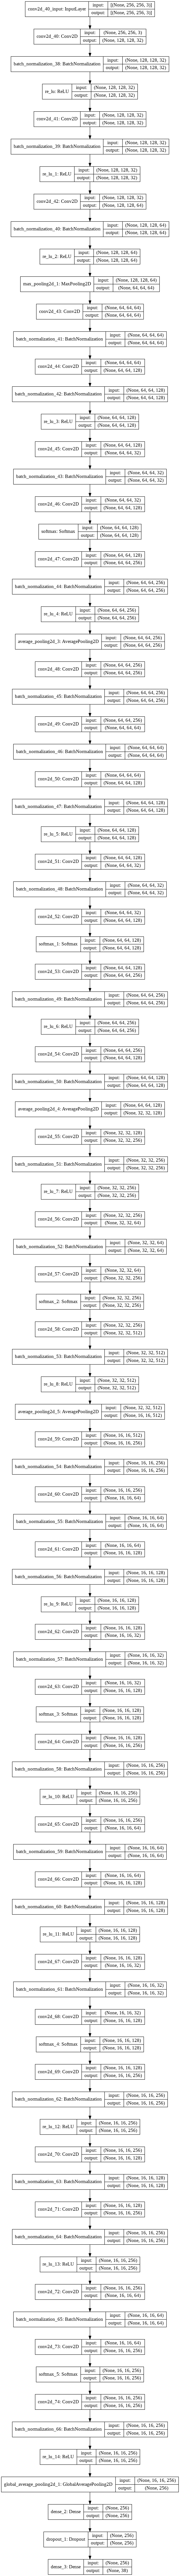

In [ ]:
model_seq = myResNest_seq()

model_seq.summary()

plot_model(model_seq, show_shapes=True, to_file='residual_module.png')

### Training

In [ ]:
path_model = '/content/drive/My Drive/NN/model_Residual_0.h5'

callbacks = [
    EarlyStopping(monitor='val_accuracy', patience=5),
    ModelCheckpoint(path_model, save_best_only=True)
]

In [ ]:
history = model.fit(train_data_gen, epochs=50,
                    validation_data=val_data_gen,
                    initial_epoch=0,
                    shuffle=True,
                    max_queue_size = 256,
                    callbacks=callbacks
                    )

In [ ]:
# accuracy plot
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('plot_accuracy_Res')
plt.show()


# loss plot
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('plot_loss_Res')
plt.show()

In [ ]:
%cd '/content/drive/MyDrive/NN/model_3L_simplified/'
model = tf.keras.models.load_model('model_model_2-3-2_256_FT.h5')

/content/drive/MyDrive/NN/model_3L_simplified


### Test phase

In [ ]:
# load models to be tested
%cd '/content/drive/MyDrive/NN/model_3L_simplified/'
model_0  = tf.keras.models.load_model('model_model_2-3-2_256_FT.h5')

'''
model_1 = tf.keras.models.load_model('model_3L_simplified/(256)model_3L_more_simplified.h5')
model_2 = tf.keras.models.load_model('model_3L_simplified/model_2-3-2_256.h5')
model_3 = tf.keras.models.load_model('model_3L_simplified/model_3L_simplified.h5')
model_4= tf.keras.models.load_model('model_2L_aug/model_2L_Flips.h5')
model_5= tf.keras.models.load_model('model_2L_aug/model_2L_Flips_retrained.h5')
'''


/content/drive/MyDrive/NN/model_3L_simplified


"\nmodel_1 = tf.keras.models.load_model('model_3L_simplified/(256)model_3L_more_simplified.h5')\nmodel_2 = tf.keras.models.load_model('model_3L_simplified/model_2-3-2_256.h5')\nmodel_3 = tf.keras.models.load_model('model_3L_simplified/model_3L_simplified.h5')\nmodel_4= tf.keras.models.load_model('model_2L_aug/model_2L_Flips.h5')\nmodel_5= tf.keras.models.load_model('model_2L_aug/model_2L_Flips_retrained.h5')\n"

In [ ]:
# evaluate models over test set
eva_0 = model_0.evaluate(test_data_gen)
'''
eval_1 = model_1.evaluate(test_data_gen)
eval_2 = model_2.evaluate(test_data_gen)
eval_3 = model_3.evaluate(test_data_gen)
#eval_4 = model_4.evaluate(test_data_gen)
eval_5 = model_5.evaluate(test_data_gen)
'''

340/340 [==============================] - 60s 174ms/step - loss: 0.1328 - accuracy: 0.9566


'\neval_1 = model_1.evaluate(test_data_gen)\neval_2 = model_2.evaluate(test_data_gen)\neval_3 = model_3.evaluate(test_data_gen)\n#eval_4 = model_4.evaluate(test_data_gen)\neval_5 = model_5.evaluate(test_data_gen)\n'

In [ ]:
# define variables needed for further inspection/evaluation
import random

image_batch=[]
label_batch=[]
paths=[]
names = ['Apple___Apple_scab',
  'Apple___Black_rot',
  'Apple___Cedar_apple_rust',
  'Apple___healthy',
  'Blueberry___healthy',
  'Cherry_(including_sour)___healthy',
  'Cherry_(including_sour)___Powdery_mildew',
  'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
  'Corn_(maize)___Common_rust_',
  'Corn_(maize)___healthy',
  'Corn_(maize)___Northern_Leaf_Blight',
  'Grape___Black_rot',
  'Grape___Esca_(Black_Measles)',
  'Grape___healthy',
  'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
  'Orange___Haunglongbing_(Citrus_greening)',
  'Peach___Bacterial_spot',
  'Peach___healthy',
  'Pepper,_bell___Bacterial_spot',
  'Pepper,_bell___healthy',
  'Potato___Early_blight',
  'Potato___healthy',
  'Potato___Late_blight',
  'Raspberry___healthy',
  'Soybean___healthy',
  'Squash___Powdery_mildew',
  'Strawberry___healthy',
  'Strawberry___Leaf_scorch',
  'Tomato___Bacterial_spot',
  'Tomato___Early_blight',
  'Tomato___healthy',
  'Tomato___Late_blight',
  'Tomato___Leaf_Mold',
  'Tomato___Septoria_leaf_spot',
  'Tomato___Spider_mites Two-spotted_spider_mite',
  'Tomato___Target_Spot',
  'Tomato___Tomato_mosaic_virus',
  'Tomato___Tomato_Yellow_Leaf_Curl_Virus']

names_0 = [
  'Apple___Black_rot',
  'Apple___Cedar_apple_rust',
  'Apple___healthy',
  'Cherry_(including_sour)___healthy',
  'Grape___healthy',
  'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
  'Orange___Haunglongbing_(Citrus_greening)',
  'Peach___healthy',
  'Pepper,_bell___healthy',
  'Squash___Powdery_mildew']

In [ ]:
#hand crafted evaluation cycle with visual output

equal_0 = 0
#equal_1 = 0
#equal_2 = 0 
#equal_3 = 0
#equal_5 = 0 

for i in range(500):
  path = '/content/localdata/test/' + test_data_gen.filenames[random.randint(0,10875)]
  #path = '/content/localdata/test/' + test_data_gen.filenames[i]
  #print(path)
  z=0
  num=0
  part=''

  while z < len(path):
    if path[z] == "/" :
      num+=1
    if num == 4 :
      part += path[z]

    z+=1

  paths.append(part[1:])
  image = keras.preprocessing.image.load_img(path)
  image_ = resize(np.array(image), (256,256))
  image__ = image_.reshape((1,256,256,3))

  predictions_0 = model_0.predict(image__, batch_size = 1 )
  #predictions_1 = model_1.predict(image__, batch_size = 1 )
  #predictions_2 = model_2.predict(image__, batch_size = 1 )
  #predictions_3 = model_3.predict(image__, batch_size = 1 )
  #predictions_5 = model_5.predict(image__, batch_size = 1 )

  x_0 = np.argmax(predictions_0)
  #x_1 = np.argmax(predictions_1)
  #x_2 = np.argmax(predictions_2)
  #x_3 = np.argmax(predictions_3)
  #x_5 = np.argmax(predictions_5)

  xx_0 = to_classes_dict[x_0]
  #xx_1 = to_classes_dict[x_1]
  #xx_2 = to_classes_dict[x_2]
  #xx_3 = to_classes_dict[x_3]
  #xx_5 = to_classes_dict[x_5]

  if (part[1:]==xx_0):
    print(part[1:] + '-----' + xx_0 + '----------YEEEES--------')
    equal_0+=1
  else:
    print(part[1:] + '-----' + xx_0 + '----------NOOOOO--------')

  '''

  if (part[1:]==xx_1):
    print(part[1:] + '-----' + xx_1 + '----------YEEEES--------')
    equal_1+=1
  else:
    print(part[1:] + '-----' + xx_1 + '----------NOOOOO--------')

  if (part[1:]==xx_2):
    print(part[1:] + '-----' + xx_2 + '----------YEEEES--------')
    equal_2+=1
  else:
    print(part[1:] + '-----' + xx_2 + '----------NOOOOO--------')
  
  if (part[1:]==xx_3):
    print(part[1:] + '-----' + xx_3 + '----------YEEEES--------')
    equal_3+=1
  else:
    print(part[1:] + '-----' + xx_3 + '----------NOOOOO--------')

  if (part[1:]==xx_5):
    print(part[1:] + '-----' + xx_5 + '----------YEEEES--------')
    equal_5+=1
  else:
    print(part[1:] + '-----' + xx_5 + '----------NOOOOO--------')

  '''

print(equal_0)
#print(equal_1)
#print(equal_2)
#print(equal_3)
#print(equal_5)


In [ ]:
# hand crafted evaluation cycle for computing accuracy over REAL set

from os import listdir
from os.path import isfile, join

equal_0 = 0
#equal_1 = 0
#equal_2 = 0 
#equal_3 = 0
#equal_5 = 0 
img_count = 0

path = '/content/drive/My Drive/dataset/Nuove_simili_al_dataset/'

for labels in names_0:
  path_0 = path+labels
  for plants in os.listdir(path_0):
    path_1 = path_0 + '/' + plants
    image = keras.preprocessing.image.load_img(path_1)
    image_ = resize(np.array(image), (256,256))
    image__ = image_.reshape((1,256,256,3))

    predictions_0 = model_0.predict(image__, batch_size = 1 )
    #predictions_1 = model_1.predict(image__, batch_size = 1 )
    #predictions_2 = model_2.predict(image__, batch_size = 1 )
    #predictions_3 = model_3.predict(image__, batch_size = 1 )
    #predictions_5 = model_5.predict(image__, batch_size = 1 )

    x_0 = np.argmax(predictions_0)
    #x_1 = np.argmax(predictions_1)
    #x_2 = np.argmax(predictions_2)
    #x_3 = np.argmax(predictions_3)
    #x_5 = np.argmax(predictions_5)

    xx_0 = to_classes_dict[x_0]
    #xx_1 = to_classes_dict[x_1]
    #xx_2 = to_classes_dict[x_2]
    #xx_3 = to_classes_dict[x_3]
    #xx_5 = to_classes_dict[x_5]

    if (names[x_0]==labels):
      equal_0+=1
      print( '------YESSS------:')
      print( '------predicted class:')
      print(names[x_0])
    else:
      print( '------NOOOO------:')
      print( '------predicted class:')
      print(names[x_0])
      print( '------but real class:')
      print(labels)

    '''

    if (names[x_1]==labels):
      equal_1+=1
      print( '------YESSS------:')
      print( '------predicted class:')
      print(names[x_1])
    else:
      print( '------NOOOO------:')
      print( '------predicted class:')
      print(names[x_1])
      print( '------but real class:')
      print(labels)

    if (names[x_2]==labels):
      equal_2+=1
      print( '------YESSS------:')
      print( '------predicted class:')
      print(names[x_2])
    else:
      print( '------NOOOO------:')
      print( '------predicted class:')
      print(names[x_2])
      print( '------but real class:')
      print(labels)
    if (names[x_3]==labels):
      equal_3+=1
      print( '------YESSS------:')
      print( '------predicted class:')
      print(names[x_3])
    else:
      print( '------NOOOO------:')
      print( '------predicted class:')
      print(names[x_3])
      print( '------but real class:')
      print(labels)

    if (names[x_5]==labels):
      equal_5+=1
      print( '------YESSS------:')
      print( '------predicted class:')
      print(names[x_5])
    else:
      print( '------NOOOO------:')
      print( '------predicted class:')
      print(names[x_5])
      print( '------but real class:')
      print(labels)

    '''
    img_count+=1

print(equal_0/img_count)
#print(equal_1/img_count)
#print(equal_2/img_count)
#print(equal_3/img_count)
#print(equal_5/img_count)